# AlexNet in Keras

## Requirements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%run "~/PycharmProjects/AlexNet-Keras-sampledata/train.py"
print("Setup ok ")
print(tf.__version__)
image_width = 224
image_height = 224
image_size = (image_width, image_height)
batch_size = 10

Setup ok 
2.0.0


## Load Data

In [2]:
df = generate_data()
df

,file,class
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.102.jpg,0
4,cat.11.jpg,0
...,...,...
106,dog.5.jpg,1
107,dog.6.jpg,1
108,dog.7.jpg,1
109,dog.8.jpg,1


## Generate Model

In [17]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         8

## Show Sample Image

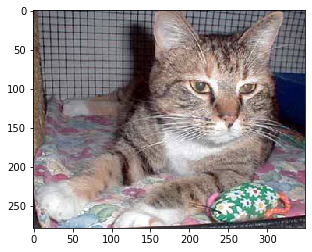

This is cat
indeces :  45 path  data/cat.282.jpg


In [19]:
index = np.random.randint(df.shape[0])
path = "data/" + df['file'].iloc[index]

data = plt.imread(path)
plt.imshow(data)
plt.show()

print("This is {}".format(df['file'].iloc[index].split('.')[0]))

print("indeces : ",index+1 ,"path " ,path)

## Training

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(
    rotation_range=55,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


train_generator = data.flow_from_dataframe(
    df, 
    "data/", 
    x_col='file',
    y_col='class',
    target_size=image_size,
    class_mode='binary',
    batch_size=batch_size
)

Found 111 validated image filenames belonging to 2 classes.


In [18]:
model.fit(train_generator, epochs=3)

Train for 12 steps
Epoch 1/3
12/12 [==============================] - 22s 2s/step - loss: 10.0288 - accuracy: 0.2973
Epoch 2/3
12/12 [==============================] - 12s 985ms/step - loss: 10.0288 - accuracy: 0.2973
Epoch 3/3
12/12 [==============================] - 11s 942ms/step - loss: 10.0288 - accuracy: 0.2973
